# Feature Engineering

### Inputs
- Test and Train set .csv files of cleaned data

### Outputs
- Selected best transformers
- Engineered Train Set data .csv file

### Objectives
- Choose best transformers to engineer features
- Engineer data to resemble normal distribution and have skewness/kurtosis scores closer to 0
- Drop features correlated with each other using Smart Correlated Selection

------------------

Get current directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/concrete-strength/jupyter_notebooks'

Change current directory to parent directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/concrete-strength'

-------------------------

## Load dataset with target feature of concrete strength dropped

In [7]:
import pandas as pd
df_new = pd.read_csv("inputs/datasets/raw/Concrete_Data_Yeh.csv").drop(['csMPa'], axis=1)
df_new.head(3)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270


Transformations

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pingouin as pg 
from feature_engine import transformation as vt

In [6]:
def calculate_skewness_and_kurtosis(df, col):
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

def distributions(df):
    for col in df.columns:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        sns.histplot(data=df, x=col, kde=True, ax=axes[0])
        pg.qqplot(df[col], dist='norm', ax=axes[1])
        plt.show()
        calculate_skewness_and_kurtosis(df, col)

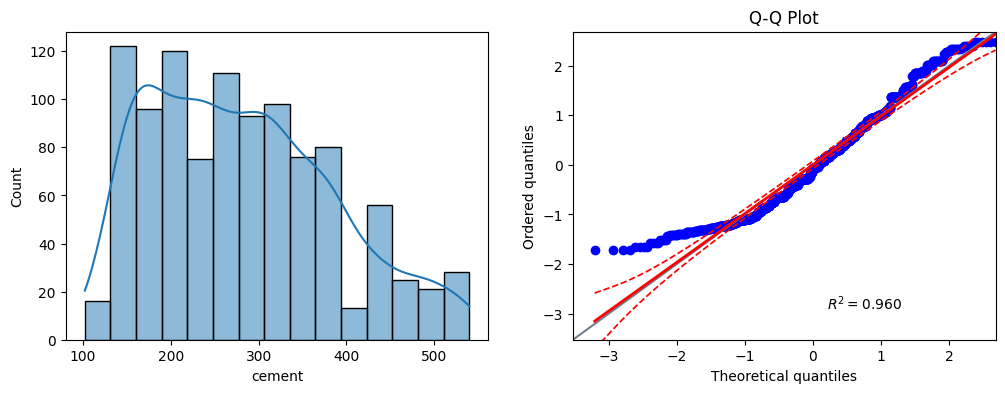

Skewness: 0.509481178871773, Kurtosis: -0.5206522844987744


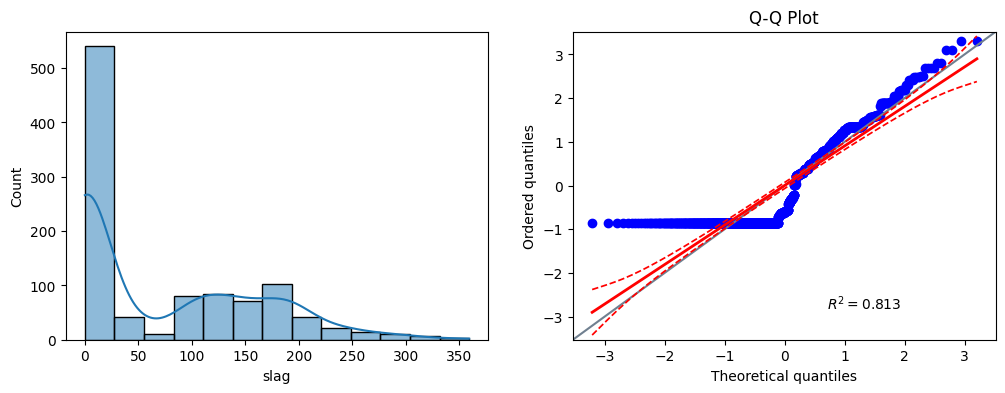

Skewness: 0.8007168956061772, Kurtosis: -0.5081754788835449


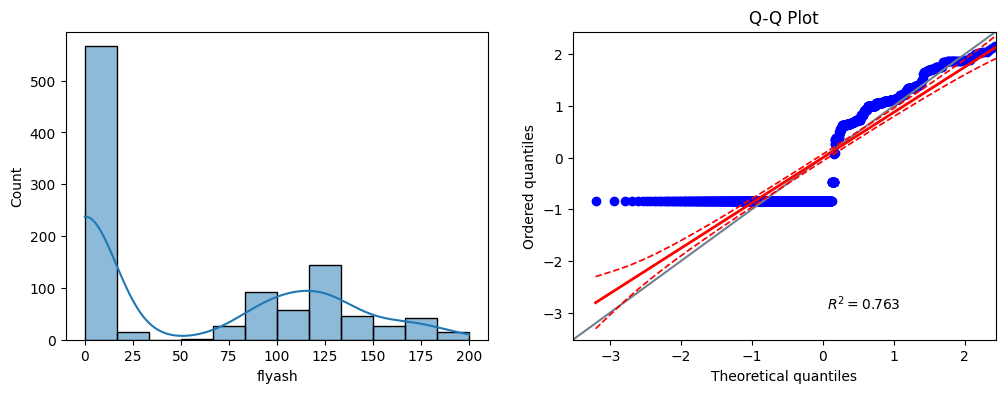

Skewness: 0.5373539058066844, Kurtosis: -1.3287464346799722


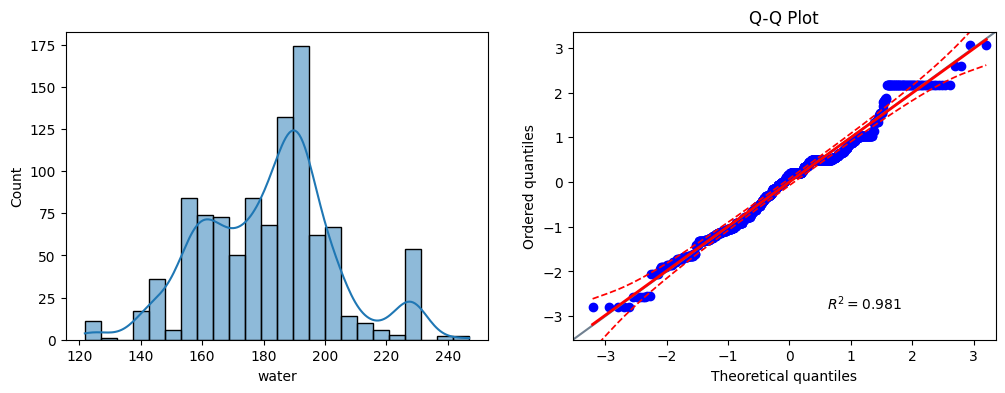

Skewness: 0.07462838428549402, Kurtosis: 0.1220816743945825


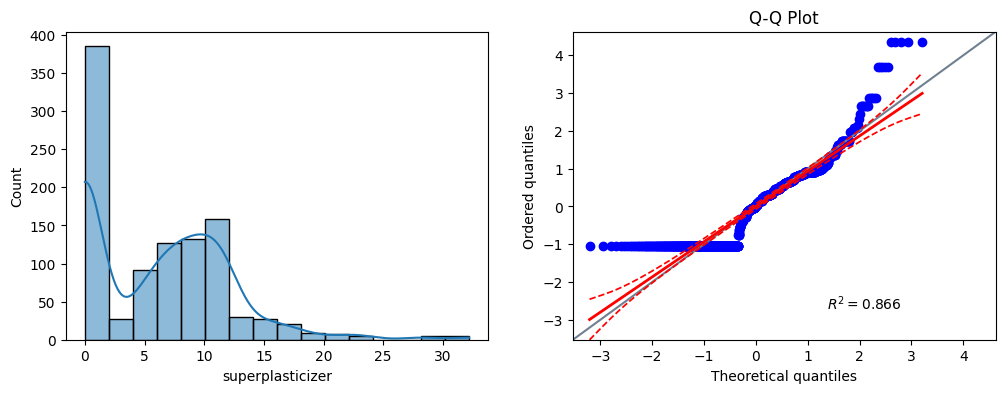

Skewness: 0.9072025748672465, Kurtosis: 1.4112689653489738


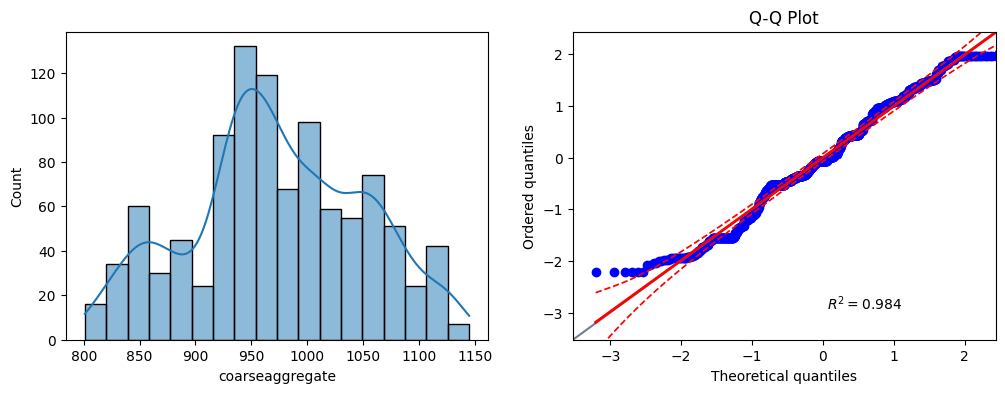

Skewness: -0.04021974481106706, Kurtosis: -0.5990161032185637


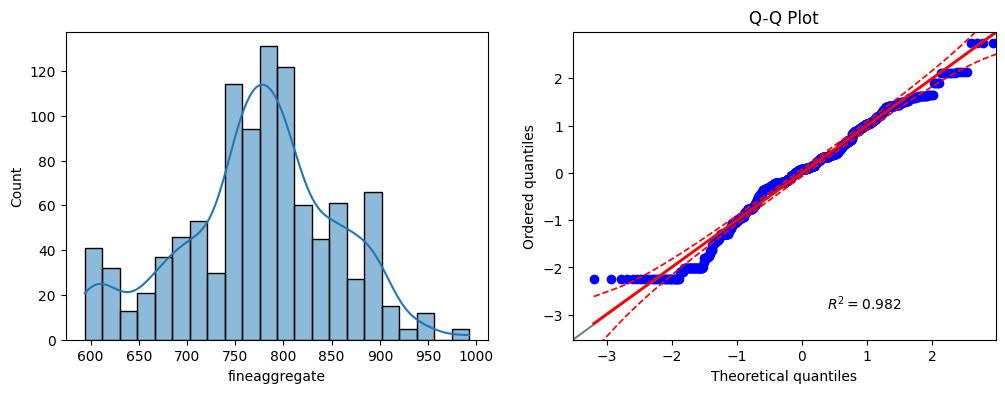

Skewness: -0.25300959769707576, Kurtosis: -0.10217698932117791


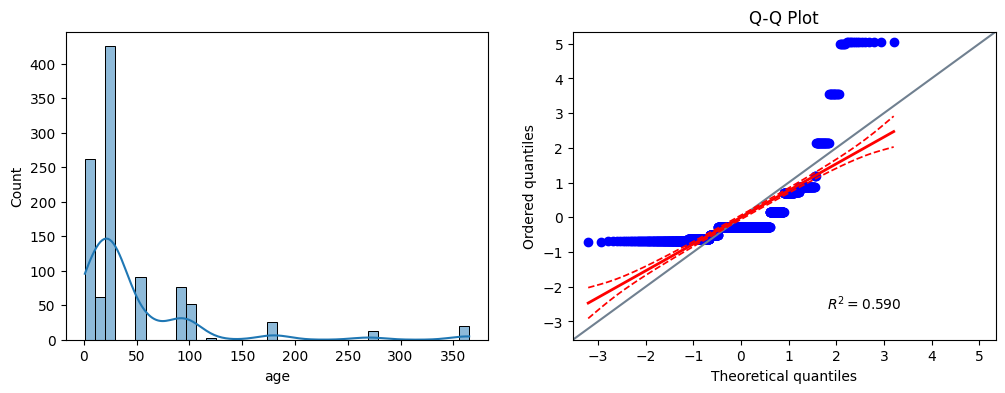

Skewness: 3.26917740063459, Kurtosis: 12.168988978672088


In [9]:
distributions(df_new)

Numerical Variable Transformations - Log transformer, power transformer, reciprocal transformer, Box Cox, Yeo Johnson

Add 1 to all cells to allow for numerical transformations

In [10]:
df_plus_one = df_new.apply(lambda x : x+1)
df_plus_one.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,541.0,1.0,1.0,163.0,3.5,1041.0,677.0,29
1,541.0,1.0,1.0,163.0,3.5,1056.0,677.0,29
2,333.5,143.5,1.0,229.0,1.0,933.0,595.0,271
3,333.5,143.5,1.0,229.0,1.0,933.0,595.0,366
4,199.6,133.4,1.0,193.0,1.0,979.4,826.5,361


Apply transformations

In [11]:
def feature_engineering_methods(df, transformers): 
    for col in df.columns:
        skew_dict = {}
        kurtosis_dict = {}
        col_dataframe = df[col].to_frame()
        for transformer in transformers:
            col_feat_eng = transformer.fit_transform(col_dataframe)
            skew = col_feat_eng.skew(axis=0)
            kurtosis = col_feat_eng.kurtosis(axis=0)
            skew_dict.update({transformer: skew[col]})
            kurtosis_dict.update({transformer: kurtosis[col]})
            
        best_skew = min(skew_dict.values(), key=abs) 
        best_kurtosis = min(kurtosis_dict.values(), key=abs) 
        skew_key = list(skew_dict.keys())[list(skew_dict.values()).index(best_skew)]
        kurtosis_key = list(kurtosis_dict.keys())[list(kurtosis_dict.values()).index(best_kurtosis)]
        print(f'Transformer with best skewness value for {col}: {skew_key} - {best_skew}')
        print(f'Transformer with best kurtosis value for {col}: {kurtosis_key}- {best_kurtosis}')
        # could try and add function that returns average of skew + kurtosis values for each transformer



In [12]:
transformers_list = ((
    vt.LogTransformer(),
    vt.LogTransformer(base="10"),
    vt.PowerTransformer(),
    vt.ReciprocalTransformer(),
    vt.BoxCoxTransformer(),
    vt.YeoJohnsonTransformer()
    ))


feature_engineering_methods(df = df_plus_one, transformers = transformers_list)

Transformer with best skewness value for cement: YeoJohnsonTransformer() - -0.018552024767257803
Transformer with best kurtosis value for cement: ReciprocalTransformer()- 0.03029339834144329
Transformer with best skewness value for slag: YeoJohnsonTransformer() - 0.002600828248701897
Transformer with best kurtosis value for slag: PowerTransformer()- -1.549586601128586
Transformer with best skewness value for flyash: ReciprocalTransformer() - -0.19951046850814294
Transformer with best kurtosis value for flyash: PowerTransformer()- -1.7645485713122484
Transformer with best skewness value for water: YeoJohnsonTransformer() - 0.0031967182672353223
Transformer with best kurtosis value for water: YeoJohnsonTransformer()- 0.11617852112857463
Transformer with best skewness value for superplasticizer: PowerTransformer() - 0.06624723417661314
Transformer with best kurtosis value for superplasticizer: PowerTransformer()- -1.1093519091904098
Transformer with best skewness value for coarseaggregate

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/feature_engine/transformation/reciprocal.py:135: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, self.variables_] = X.loc[:, self.variables_].astype("float")


Apply chosen transformer to each variable:
Cement: Yeo-Johnson
Slag: Yeo-Johnson
Water: Yeo-Johnson
Superplasticiser: Power
Fly ash: Reciprocal
Coarse aggregate: Yeo-Johnson
Fine aggregate: Yeo-Johnson
Age: Box-Cox

In [21]:

#apply appropriate transformer to each column in df_plus_one
#add applied transformer to empty engineered 
yjt = vt.YeoJohnsonTransformer()
bct = vt.BoxCoxTransformer()
pt = vt.PowerTransformer()
rt = vt.ReciprocalTransformer()

df_engineering = pd.DataFrame(columns=['cement', 'slag', 'flyash', 'water', 
'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa'])
yjt_variables = ['cement', 'slag', 'water', 'coarseaggregate', 'fineaggregate']
for var in yjt_variables:
    transformed = yjt.fit_transform(df_plus_one[var].to_numpy().reshape(-1, 1))
    df_engineering[var] = transformed
rt_transformed = rt.fit_transform(df_plus_one['flyash'].to_numpy().reshape(-1, 1))
df_engineering['flyash'] = rt_transformed
pt_transformed = pt.fit_transform(df_plus_one['superplasticizer'].to_numpy().reshape(-1, 1))
df_engineering['superplasticizer'] = pt_transformed
bct_transformed = bct.fit_transform(df_plus_one['age'].to_numpy().reshape(-1, 1))
df_engineering['age'] = bct_transformed

df_engineering['csMPa'] = pd.read_csv("inputs/datasets/raw/Concrete_Data_Yeh.csv")['csMPa']
print(df_engineering.shape)
df_engineering.head()




(1030, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,11.138686,0.692662,1.0,74.797774,1.870829,2269.592565,83874.646831,3.377358,79.99
1,11.138686,0.692662,1.0,74.797774,1.870829,2306.547918,83874.646831,3.377358,61.89
2,9.813326,4.948381,1.0,98.669830,1.000000,2005.603189,66232.900982,5.630006,40.27
3,9.813326,4.948381,1.0,98.669830,1.000000,2005.603189,66232.900982,5.933598,41.05
4,8.520842,4.876641,1.0,85.841906,1.000000,2118.561303,120826.246384,5.919698,44.30


Smart correlated selection

In [22]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")
df_engineering_copy = df_engineering.copy()


corr_sel.fit_transform(df_engineering_copy)
corr_sel.correlated_feature_sets_

[{'superplasticizer', 'water'}]

In [23]:
corr_sel.features_to_drop_

['superplasticizer']

In [24]:
df_complete = df_engineering.drop('superplasticizer', axis=1)
print(df_complete.shape)
df_complete.head()

(1030, 8)


,cement,slag,flyash,water,coarseaggregate,fineaggregate,age,csMPa
0,11.138686,0.692662,1.0,74.797774,2269.592565,83874.646831,3.377358,79.99
1,11.138686,0.692662,1.0,74.797774,2306.547918,83874.646831,3.377358,61.89
2,9.813326,4.948381,1.0,98.669830,2005.603189,66232.900982,5.630006,40.27
3,9.813326,4.948381,1.0,98.669830,2005.603189,66232.900982,5.933598,41.05
4,8.520842,4.876641,1.0,85.841906,2118.561303,120826.246384,5.919698,44.30


In [25]:
df_complete.to_csv("outputs/datasets/cleaned/DatasetEngineered.csv", index=False)

In [26]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [27]:
EvaluateMissingData(df_complete)

,RowsWithMissingData,PercentageOfDataset,DataType
